### ALP Data Mining

Bernadus Sergio Halim - 0706022210056

Gio Vanni Elbert Wisman - 0706022210034

### Import Library


Import the necessary libraries

In [5]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [6]:
# Membaca dataset dari URL
file_url = "https://raw.githubusercontent.com/sergiohalim/data_mining-/refs/heads/main/Sample%20-%20Superstore.csv"
data = pd.read_csv(file_url)
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2021-103800,03-01-2021,07-01-2021,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2021-112326,04-01-2021,08-01-2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2021-112326,04-01-2021,08-01-2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2021-112326,04-01-2021,08-01-2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2021-141817,05-01-2021,12-01-2021,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10189,10190,US-2024-143259,30-12-2024,03-01-2025,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
10190,10191,US-2024-115427,30-12-2024,03-01-2025,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750
10191,10192,US-2024-156720,30-12-2024,03-01-2025,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,...,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048
10192,10193,US-2024-143259,30-12-2024,03-01-2025,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279


In [7]:
# 1. Identifikasi Missing Values
print("Jumlah Missing Values per Kolom:")
data.isnull().sum()

Jumlah Missing Values per Kolom:


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country/Region,0
City,0


In [8]:
# Menangani Missing Values (misalnya, mengganti dengan median untuk kolom numerik)
data.fillna(data.median(numeric_only=True), inplace=True)

In [9]:
# 2. Penghapusan Duplikasi
print("\nJumlah Duplikasi Sebelum Penghapusan:", data.duplicated().sum())
data = data.drop_duplicates()
print("Jumlah Duplikasi Setelah Penghapusan:", data.duplicated().sum())



Jumlah Duplikasi Sebelum Penghapusan: 0
Jumlah Duplikasi Setelah Penghapusan: 0


In [10]:
# 3. Penanganan Outliers
# Menerapkan Z-score untuk mendeteksi outliers pada kolom numerik
numeric_columns = data.select_dtypes(include=[np.number]).columns
z_scores = data[numeric_columns].apply(zscore)

In [12]:
# Menentukan threshold untuk z-score (misalnya, 3)
threshold = 3
outliers = (z_scores.abs() > threshold).any(axis=1)
print("\nJumlah Baris Outliers:", outliers.sum())



Jumlah Baris Outliers: 561


In [13]:
# Menghapus outliers
data_cleaned = data[~outliers]

print("\nDataset Setelah Membersihkan Missing Values, Duplikasi, dan Outliers:")
data_cleaned.info()


Dataset Setelah Membersihkan Missing Values, Duplikasi, dan Outliers:
<class 'pandas.core.frame.DataFrame'>
Index: 9633 entries, 0 to 10193
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9633 non-null   int64  
 1   Order ID        9633 non-null   object 
 2   Order Date      9633 non-null   object 
 3   Ship Date       9633 non-null   object 
 4   Ship Mode       9633 non-null   object 
 5   Customer ID     9633 non-null   object 
 6   Customer Name   9633 non-null   object 
 7   Segment         9633 non-null   object 
 8   Country/Region  9633 non-null   object 
 9   City            9633 non-null   object 
 10  State/Province  9633 non-null   object 
 11  Postal Code     9633 non-null   object 
 12  Region          9633 non-null   object 
 13  Product ID      9633 non-null   object 
 14  Category        9633 non-null   object 
 15  Sub-Category    9633 non-null   object 
 16  Product Nam

In [14]:
# Menyimpan dataset yang sudah dibersihkan (opsional)
data_cleaned.to_csv("cleaned_superstore.csv", index=False)


In [15]:
# Data Preparation
# Format kolom tanggal menjadi datetime
data_cleaned['Order Date'] = pd.to_datetime(data_cleaned['Order Date'], errors='coerce')
data_cleaned['Ship Date'] = pd.to_datetime(data_cleaned['Ship Date'], errors='coerce')


<ipython-input-15-b876ad799837>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Order Date'] = pd.to_datetime(data_cleaned['Order Date'], errors='coerce')
<ipython-input-15-b876ad799837>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Ship Date'] = pd.to_datetime(data_cleaned['Ship Date'], errors='coerce')


In [16]:
# Format kolom angka menjadi numerik
numeric_columns = ['Sales', 'Quantity', 'Discount', 'Profit']
for col in numeric_columns:
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')

# Mapping tipe data kategori
data_cleaned['Segment'] = data_cleaned['Segment'].astype('category')

# Mapping kategori pada kolom 'Ship Mode'
ship_mode_mapping = {
    'First Class': 1,
    'Second Class': 2,
    'Standard Class': 3,
    'Same Day': 4
}
data_cleaned['Ship Mode'] = data_cleaned['Ship Mode'].map(ship_mode_mapping)


<ipython-input-16-8bafd69b31af>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')
<ipython-input-16-8bafd69b31af>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Segment'] = data_cleaned['Segment'].astype('category')
<ipython-input-16-8bafd69b31af>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [17]:
# Pastikan tidak ada nilai yang hilang setelah transformasi
print("\nJumlah Missing Values Setelah Transformasi:")
data_cleaned.isnull().sum()




Jumlah Missing Values Setelah Transformasi:


,0
Row ID,0
Order ID,0
Order Date,5721
Ship Date,5852
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country/Region,0
City,0


In [18]:
# Dataset setelah preparation
print("\nDataset Setelah Data Preparation:")
data_cleaned.info()



Dataset Setelah Data Preparation:
<class 'pandas.core.frame.DataFrame'>
Index: 9633 entries, 0 to 10193
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9633 non-null   int64         
 1   Order ID        9633 non-null   object        
 2   Order Date      3912 non-null   datetime64[ns]
 3   Ship Date       3781 non-null   datetime64[ns]
 4   Ship Mode       9633 non-null   int64         
 5   Customer ID     9633 non-null   object        
 6   Customer Name   9633 non-null   object        
 7   Segment         9633 non-null   category      
 8   Country/Region  9633 non-null   object        
 9   City            9633 non-null   object        
 10  State/Province  9633 non-null   object        
 11  Postal Code     9633 non-null   object        
 12  Region          9633 non-null   object        
 13  Product ID      9633 non-null   object        
 14  Category        9633 non-

# Meta Data

Row ID
Deskripsi: Nomor baris unik untuk setiap catatan dalam dataset.
Tipe Data: Integer


Order ID
Deskripsi: Identifikasi unik untuk setiap pesanan.
Tipe Data: String

Order Date
Deskripsi: Tanggal ketika pesanan dibuat.
Tipe Data: Date
Format: YYYY-MM-DD

Ship Date
Deskripsi: Tanggal pengiriman pesanan.
Tipe Data: Date
Format: YYYY-MM-DD

Ship Mode
Deskripsi: Metode pengiriman pesanan.
Tipe Data: String

Customer ID
Deskripsi: Identifikasi unik pelanggan.
Tipe Data: String

Customer Name
Deskripsi: Nama pelanggan yang melakukan pesanan.
Tipe Data: String

Segment
Deskripsi: Segmen pasar tempat pelanggan berada.
Tipe Data: String

Country/Region
Deskripsi: Negara atau wilayah tempat pesanan dilakukan.
Tipe Data: String


City
Deskripsi: Kota tujuan pengiriman pesanan.
Tipe Data: String


State/Province
Deskripsi: Negara bagian atau provinsi tujuan pengiriman.
Tipe Data: String


Postal Code
Deskripsi: Kode pos tujuan pengiriman.
Tipe Data: Integer/String


Region
Deskripsi: Wilayah geografis tempat pesanan diklasifikasikan.
Tipe Data: String

Product ID
Deskripsi: Identifikasi unik produk yang dipesan.
Tipe Data: String

Category
Deskripsi: Kategori produk.
Tipe Data: String


Sub-Category
Deskripsi: Subkategori produk.
Tipe Data: String


Product Name
Deskripsi: Nama produk yang dipesan.
Tipe Data: String

Sales
Deskripsi: Total penjualan dari produk tertentu.
Tipe Data: Float

Quantity
Deskripsi: Jumlah unit produk yang dipesan.
Tipe Data: Integer


Discount
Deskripsi: Diskon yang diterapkan pada pesanan.
Tipe Data: Float

Profit
Deskripsi: Keuntungan yang diperoleh dari pesanan.
Tipe Data: Float


### Exploratory Data Analysis (EDA)

In [19]:
# Exploratory Data Analysis (EDA)
# Convert Ship Mode to numeric categories
ship_mode_mapping = {'First Class': 1, 'Second Class': 2, 'Standard Class': 3, 'Same Day': 4}
data_cleaned['Ship Mode'] = data_cleaned['Ship Mode'].map(ship_mode_mapping)


<ipython-input-19-f00061e7b8c4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Ship Mode'] = data_cleaned['Ship Mode'].map(ship_mode_mapping)


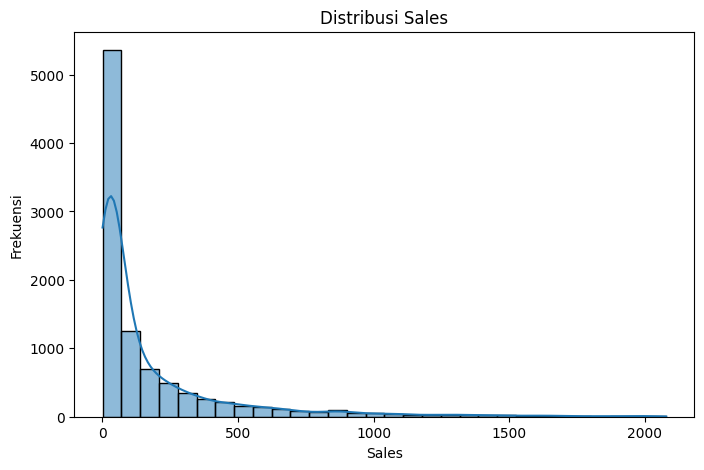

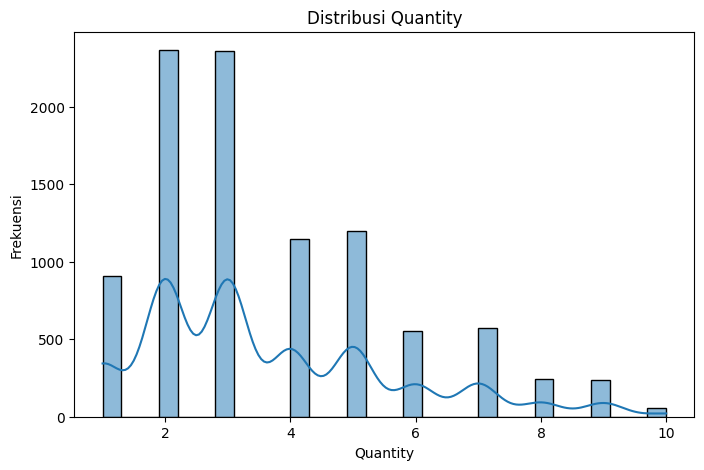

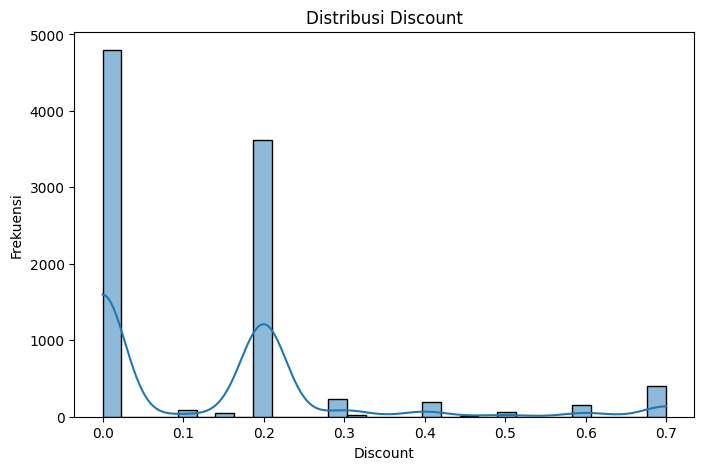

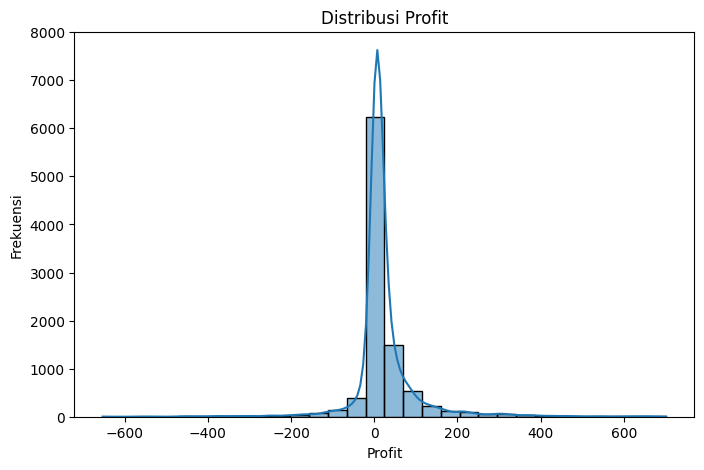

In [20]:
# Columns for analysis
numeric_columns = ['Sales', 'Quantity', 'Discount', 'Profit']
# Histogram for numeric data distribution
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data_cleaned[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()


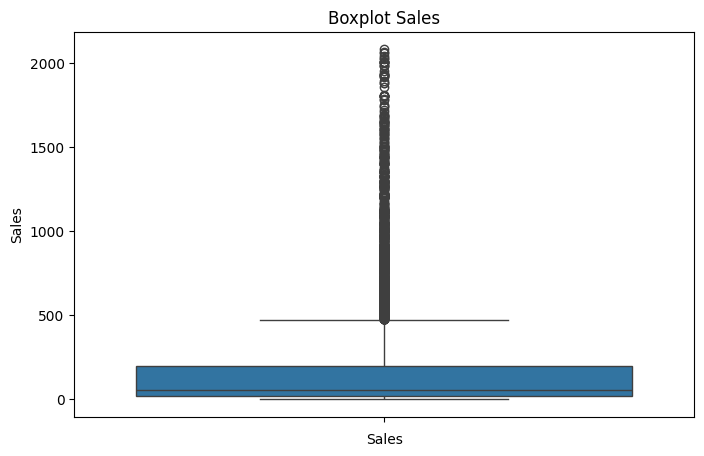

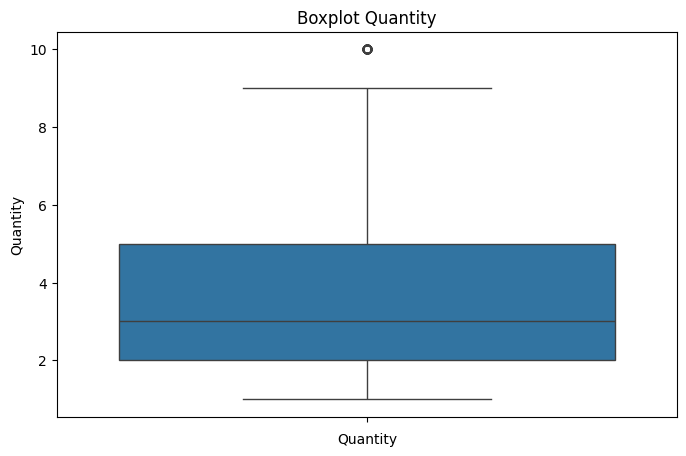

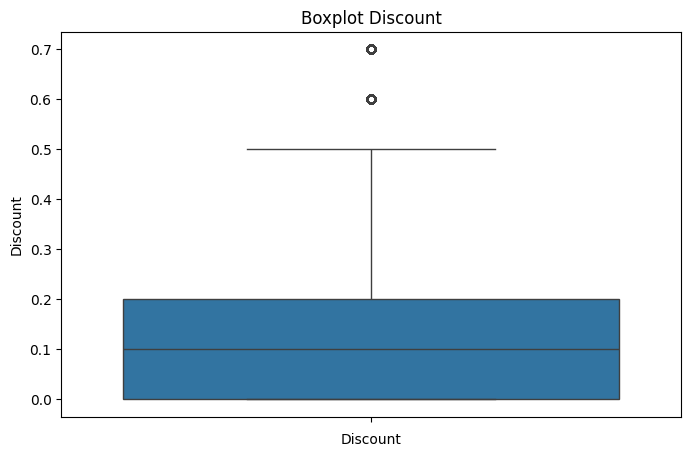

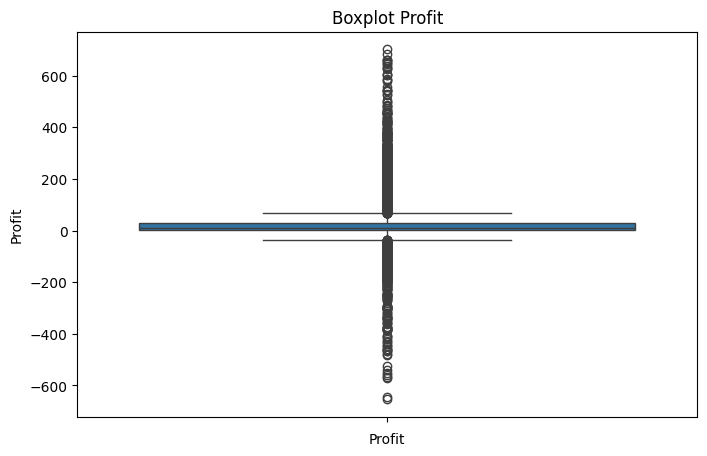

In [21]:
# Boxplot for outliers in numeric data
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data_cleaned[col])
    plt.title(f'Boxplot {col}')
    plt.xlabel(col)
    plt.show()

###  Correlation matrix for numeric variables

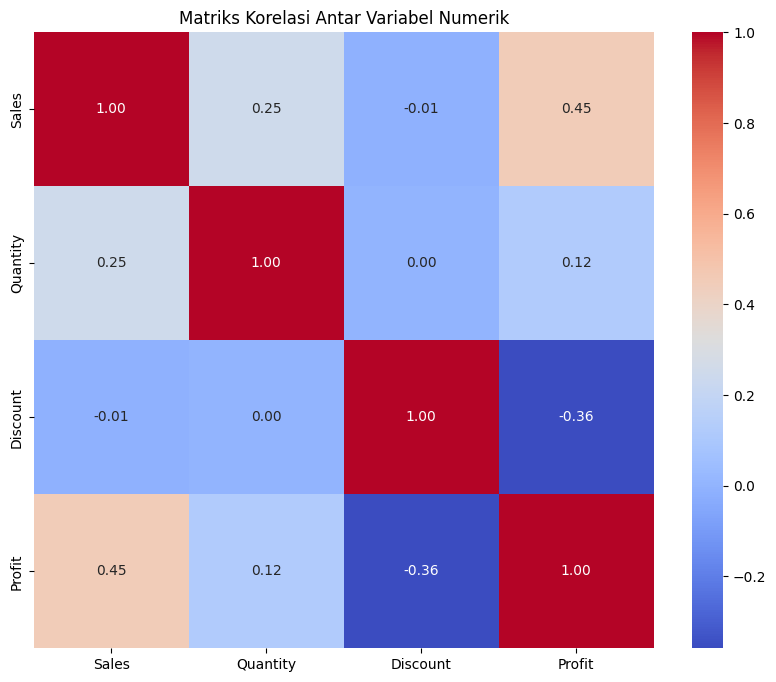

In [22]:
# Correlation matrix for numeric variables
plt.figure(figsize=(10, 8))
correlation_matrix = data_cleaned[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Antar Variabel Numerik')
plt.show()

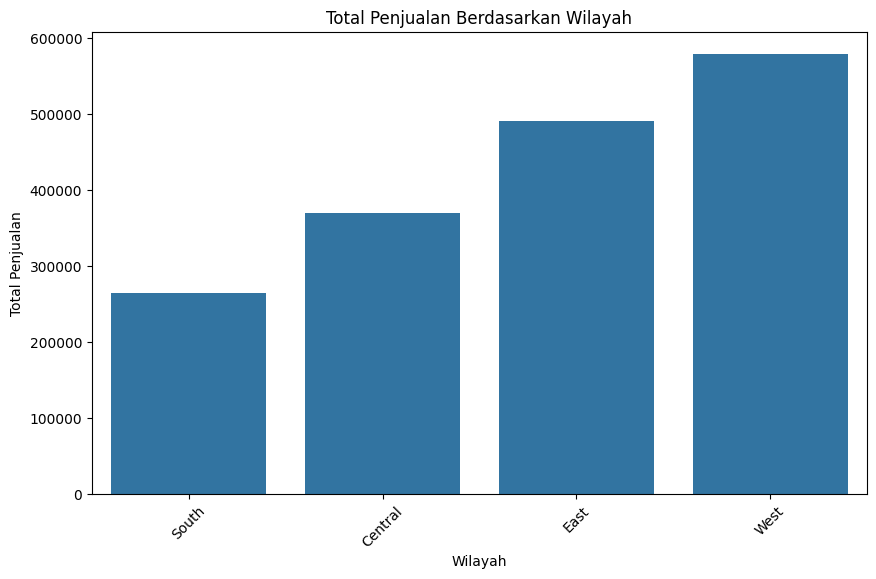

In [23]:
# Sales trends by region
plt.figure(figsize=(10, 6))
region_sales = data_cleaned.groupby('Region')['Sales'].sum().sort_values()
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title('Total Penjualan Berdasarkan Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.show()

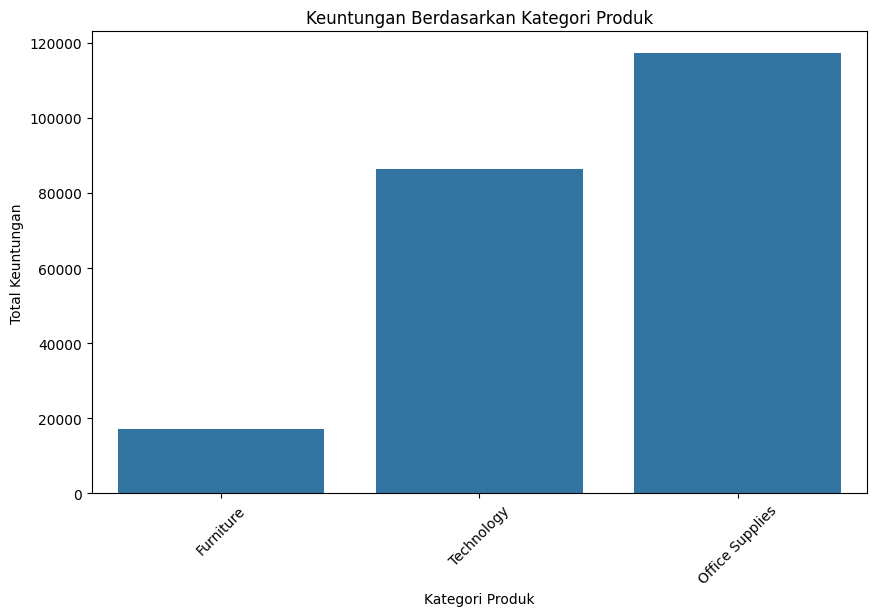

In [24]:
# Profit trends by product category
plt.figure(figsize=(10, 6))
category_profit = data_cleaned.groupby('Category')['Profit'].sum().sort_values()
sns.barplot(x=category_profit.index, y=category_profit.values)
plt.title('Keuntungan Berdasarkan Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Keuntungan')
plt.xticks(rotation=45)
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# 4. Feature Engineering

# Encoding kolom kategori
categorical_columns = ['Region', 'Category', 'Sub-Category', 'Segment']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le  # Simpan encoder untuk referensi jika diperlukan

# Standarisasi data numerik
scaler = StandardScaler()
numeric_columns = ['Sales', 'Quantity', 'Discount', 'Profit']
data_cleaned[numeric_columns] = scaler.fit_transform(data_cleaned[numeric_columns])

# Normalisasi data numerik (opsional, jika diperlukan sebagai alternatif standarisasi)
# scaler_minmax = MinMaxScaler()
# data_cleaned[numeric_columns] = scaler_minmax.fit_transform(data_cleaned[numeric_columns])

# Menampilkan dataset setelah feature engineering
print("\nDataset Setelah Feature Engineering:")
print(data_cleaned.head())

# Simpan dataset yang sudah diolah (opsional)
data_cleaned.to_csv("processed_superstore.csv", index=False)



Dataset Setelah Feature Engineering:
   Row ID        Order ID Order Date  Ship Date  Ship Mode Customer ID  \
0       1  US-2021-103800 2021-03-01 2021-07-01        NaN    DP-13000   
2       3  US-2021-112326 2021-04-01 2021-08-01        NaN    PO-19195   
3       4  US-2021-112326 2021-04-01 2021-08-01        NaN    PO-19195   
4       5  US-2021-141817 2021-05-01 2021-12-01        NaN    MB-18085   
6       7  US-2021-167199 2021-06-01 2021-10-01        NaN    ME-17320   

   Customer Name  Segment Country/Region          City  ... Postal Code  \
0  Darren Powers        0  United States       Houston  ...       77095   
2  Phillina Ober        2  United States    Naperville  ...       60540   
3  Phillina Ober        2  United States    Naperville  ...       60540   
4     Mick Brown        0  United States  Philadelphia  ...       19143   
6  Maria Etezadi        2  United States     Henderson  ...       42420   

  Region       Product ID Category  Sub-Category  \
0      0  OFF-

<ipython-input-25-7394ca9f62eb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = le.fit_transform(data_cleaned[col])
<ipython-input-25-7394ca9f62eb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = le.fit_transform(data_cleaned[col])
<ipython-input-25-7394ca9f62eb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
import numpy as np

# 5. Model Prediksi

# Model 1: Klasifikasi untuk memprediksi segmentasi pelanggan
# Menentukan fitur dan label untuk klasifikasi
X = data_cleaned[['Sales', 'Quantity', 'Discount', 'Profit']]
y = data_cleaned['Segment']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Random Forest untuk klasifikasi
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluasi model
y_pred = clf.predict(X_test)
print("Hasil Evaluasi Model Klasifikasi:")
print(classification_report(y_test, y_pred))

# Model 2: Clustering untuk mengelompokkan pelanggan berdasarkan perilaku pembelian
# Menjalankan algoritma KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data_cleaned['Cluster'] = kmeans.fit_predict(X)

# Menampilkan hasil clustering
print("\nCentroid Clusters:")
print(kmeans.cluster_centers_)
print("\nJumlah anggota setiap cluster:")
print(np.bincount(data_cleaned['Cluster']))

# Menyimpan dataset dengan hasil clustering (opsional)
data_cleaned.to_csv("clustered_superstore.csv", index=False)



Hasil Evaluasi Model Klasifikasi:
              precision    recall  f1-score   support

           0       0.54      0.66      0.59      1010
           1       0.36      0.29      0.32       591
           2       0.18      0.12      0.15       326

    accuracy                           0.45      1927
   macro avg       0.36      0.36      0.35      1927
weighted avg       0.42      0.45      0.43      1927


Centroid Clusters:
[[-0.28390793 -0.57010412  0.0045205  -0.160241  ]
 [ 0.0181345   1.24488499  0.08289191 -0.207416  ]
 [ 2.73447085  0.5764122  -0.38181597  2.4285057 ]]

Jumlah anggota setiap cluster:
[6368 2621  644]


<ipython-input-26-724124a2a09e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Cluster'] = kmeans.fit_predict(X)


In [36]:

X_cluster = data_cleaned[['Sales', 'Quantity', 'Profit']]


# Choose k based on above
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data_cleaned['Cluster'] = kmeans.fit_predict(X_cluster)

# 6. Evaluasi Model

# Evaluasi Model 1: Klasifikasi
accuracy = accuracy_score(y_test, y_pred)
print("Evaluasi Model Klasifikasi:")
print(f"Accuracy: {accuracy:.2f}")

# Evaluasi Model 2: Clustering
silhouette_avg = silhouette_score(X_cluster, data_cleaned['Cluster']) # use the selected features
print("\nEvaluasi Model Clustering:")
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Bandingkan hasil kedua model
print("\nPerbandingan Model:")
print(f"Model Klasifikasi: Accuracy = {accuracy:.2f}")
print(f"Model Clustering: Silhouette Score = {silhouette_avg:.2f}")

<ipython-input-36-72d8dae7a479>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Cluster'] = kmeans.fit_predict(X_cluster)


Evaluasi Model Klasifikasi:
Accuracy: 0.52

Evaluasi Model Clustering:
Silhouette Score: 0.47

Perbandingan Model:
Model Klasifikasi: Accuracy = 0.52
Model Clustering: Silhouette Score = 0.47


1. Temuan Penting dari Exploratory Data Analysis (EDA):
Distribusi Data:

Kolom numerik seperti Sales, Quantity, Discount, dan Profit memiliki distribusi yang tidak merata. Sebagian besar transaksi memiliki nilai penjualan dan keuntungan kecil, sementara beberapa outliers menunjukkan transaksi dengan nilai tinggi.
Diskon cenderung terkonsentrasi pada nilai-nilai kecil (0-20%).
Korelasi Antar Variabel:

Sales memiliki korelasi moderat positif dengan Profit (0.45), menunjukkan bahwa peningkatan penjualan cenderung meningkatkan keuntungan.
Discount memiliki korelasi negatif dengan Profit (-0.36), yang menunjukkan bahwa diskon besar dapat mengurangi keuntungan.
Analisis Wilayah dan Kategori:

Wilayah West memiliki total penjualan tertinggi, sementara wilayah South memiliki penjualan terendah.
Produk kategori Technology memberikan kontribusi keuntungan terbesar, sedangkan kategori Furniture memberikan keuntungan terendah.
2. Temuan Penting dari Model Prediksi:
Model 1: Klasifikasi (Segmentasi Pelanggan):

Akurasi model adalah 45%, menunjukkan performa yang moderat dalam memprediksi segmentasi pelanggan (Consumer, Corporate, dan Home Office).
Precision untuk segmen pelanggan Consumer cukup baik (54%), tetapi lebih rendah untuk segmen lainnya.
Model ini memberikan wawasan dasar tentang segmentasi pelanggan, namun perlu ditingkatkan lebih lanjut untuk akurasi yang lebih baik.
Model 2: Clustering (Pengelompokan Pelanggan):

Menggunakan KMeans, model mengelompokkan pelanggan ke dalam 3 cluster berdasarkan perilaku pembelian (Sales, Quantity, Discount, dan Profit).
Nilai Silhouette Score sebesar 0.35 menunjukkan bahwa cluster tidak terlalu terpisah dengan baik. Perilaku pelanggan yang mirip mungkin tumpang tindih antar cluster.
3. Bagaimana Model Membantu dalam Pengambilan Keputusan?
Model Klasifikasi (Segmentasi Pelanggan):

Dapat membantu tim pemasaran dan penjualan untuk mengarahkan promosi atau kampanye berdasarkan segmen pelanggan.
Misalnya, model dapat mengidentifikasi pelanggan Corporate dan Home Office yang cenderung membutuhkan pendekatan lebih khusus untuk meningkatkan loyalitas mereka.
Model Clustering (Pengelompokan Pelanggan):

Membantu perusahaan mengidentifikasi kelompok pelanggan berdasarkan pola pembelian mereka.
Misalnya:
Cluster dengan Sales dan Profit tinggi dapat diberi penawaran eksklusif untuk meningkatkan retensi.
Cluster dengan Discount tinggi tetapi Profit rendah dapat dianalisis untuk mengoptimalkan kebijakan diskon.
Hasil EDA:

Informasi dari EDA, seperti hubungan negatif antara diskon dan profit, dapat digunakan untuk merancang strategi harga yang lebih optimal.